<a href="https://colab.research.google.com/github/Dcodinginsane/Pandas-for-Data-Analysis/blob/main/Extract_information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import   pandas as pd


Q-1: using groupy meta groups the pclass columns and find out the average and total number  of missing values in the age column for every group

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQjh5HzZ1N0SU7ME9ZQRzeVTaXaGsV97rU8R7eAcg53k27GTstJp9cRUOfr55go1GRRvTz1NwvyOnuh/pub?gid=1562145139&single=true&output=csv"
titanic_df = pd.read_csv(url)

In [ ]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
# code  here
# code here
pclass_groups = titanic_df.groupby("Pclass")
for group in list(pclass_groups.groups.keys()):
    print(f"Pclass {group} : Avg Age {pclass_groups.get_group(group)['Age'].mean()} and total missing value {pclass_groups.get_group(group)['Age'].isna().sum()}")

Pclass 1 : Avg Age 38.233440860215055 and total missing value 30
Pclass 2 : Avg Age 29.87763005780347 and total missing value 11
Pclass 3 : Avg Age 25.14061971830986 and total missing value 136


Q-3:  Make groups based on "Embarked" column. And for each of this embarked group, make another group based on "Pclass" and find out the average fare (round off up to 2 decimal places) for each "Pclass" for each group of "Embarked".
Sample Output:

In [ ]:
# code here
my_dict = {}

embarked_groups = titanic_df.groupby("Embarked")
for embarked_group in list(embarked_groups.groups.keys()):
    pclass_groups = embarked_groups.get_group(embarked_group).groupby("Pclass")
    my_dict[embarked_group] = {}
    for pclass_group in list(pclass_groups.groups.keys()):
        my_dict[embarked_group][pclass_group] = round(pclass_groups.get_group(pclass_group)["Fare"].mean(), 2)
my_dict

{'C': {1: 104.72, 2: 25.36, 3: 11.21},
 'Q': {1: 90.0, 2: 12.35, 3: 11.18},
 'S': {1: 70.36, 2: 20.33, 3: 14.64}}

### Questions Based on Fifa Worldcup - 2022 Dataset:

In [ ]:
import pandas as pd

fifa_df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT3D_x_4DS6d51LKJ7ze1sxT5WpV5uiSVOFYHLwBiGru6vFyVv5h5-83AwFjxWYiWfCDjDAaarHAV-k/pub?gid=0&single=true&output=csv")

Q-4: Perform groupby based on the "Team" column and then perform Z Normalization on top of the below columns of each group:
Passes
Passes Completed
Attempted Line Breaks
Completed Line Breaks
You have to make a python function named z_normalization which takes two arguments:

group: Every group that you have created
cols_to_perform: This parameter takes a list of columns on which you have to perform the Z-Normalization.
For this problem, you have to use th apply() method.

#### Z − Normalization  =Xi −μ / std
                          s

After that find out the below values for each group:

minimum "Passess"

maximum "Passess"

minimum "Yellow Cards"

maximum "Yellow cards"

average "Yellow Cards"

maximum "Attempted Line Breaks"

minimum "Attempted Line Breaks"

standardard deviation of "Attempted Line Breaks"

average Possession

In [ ]:
# code here
def z_normalization(group, cols_to_perform):
    for col in cols_to_perform:
        std = group[col].std()
        mean = group[col].mean()
        group[f"{col}_z_norm"] = (group[col] - mean)/std
    return group


cols_to_perform = ["Passes", "Passes Completed", "Attempted Line Breaks", "Completed Line Breaks"]
groups = fifa_df.groupby("Team")
groups = groups.apply(z_normalization, cols_to_perform = cols_to_perform).groupby("Team")
groups.agg(
{
    "Passes": ["min", "max"],
    "Yellow Cards": ["min", "max", "mean"],
    "Attempted Line Breaks": ["max", "min", "std"],
    "Possession (%)": "mean"
})

<ipython-input-7-d22840902617>:12: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  groups = groups.apply(z_normalization, cols_to_perform = cols_to_perform).groupby("Team")


Passes       Yellow Cards               Attempted Line Breaks  \
                  min   max          min max      mean                   max   
Team                                                                           
Argentina         408   862            0   8  2.285714                   249   
Australia         286   466            0   3  1.750000                   171   
Belgium           512   685            1   3  1.666667                   195   
Brazil            548   695            0   3  1.200000                   193   
Cameroon          295   500            1   5  2.666667                   182   
Canada            448   536            2   4  2.666667                   176   
Costa Rica        231   454            1   3  2.000000                   154   
Croatia           461   724            0   2  1.142857                   259   
Denmark           537   650            1   2  1.666667                   241   
Ecuador           429   484            0   2  1.000000                   177   
England           508   810            0   1  0.200000                   208   
France            358   734            0   3  1.142857                   179   
Germany           352   827            0   3  1.000000                   256   
Ghana             319   460            2   4  2.666667                   188   
Iran              232   463            2   3  2.333333                   195   
Japan             225   591            0   3  1.500000                   253   
Korea Republic    359   548            1   2  1.500000                   201   
Mexico            356   500            1   4  2.333333                   198   
Morocco           229   583            0   3  1.285714                   157   
Netherlands       403   786            0   4  1.800000                   198   
Poland            303   466            1   3  1.750000                   156   
Portugal          461   678            0   3  1.200000                   197   
Qatar             424   457            0   4  2.333333                   174   
Saudi Arabia      267   560            2   6  4.666667                   205   
Senegal           277   511            1   3  1.750000                   184   
Serbia            403   513            2   7  4.000000                   184   
Spain             647  1070            0   1  0.500000                   237   
Switzerland       403   512            1   4  2.250000                   178   
Tunisia           328   501            1   3  1.666667                   200   
United States     427   572            0   4  1.250000                   204   
Uruguay           390   528            1   3  2.000000                   186   
Wales             325   508            1   2  1.666667                   208   

                               Possession (%)  
                min        std           mean  
Team                                           
Argentina       141  38.774685      49.285714  
Australia       133  17.682383      31.250000  
Belgium         167  14.422205      49.000000  
Brazil          164  10.691118      50.400000  
Cameroon        144  19.857828      38.333333  
Canada          102  37.753587      44.333333  
Costa Rica       86  38.974351      27.333333  
Croatia          97  54.499891      47.428571  
Denmark         173  34.000000      51.333333  
Ecuador         143  17.009801      42.666667  
England         133  29.676590      57.200000  
France          126  21.407609      44.857143  
Germany         143  56.624494      53.000000  
Ghana           122  33.020196      37.000000  
Iran             56  77.526340      31.666667  
Japan           104  64.048810      30.250000  
Korea Republic  139  27.072434      42.250000  
Mexico          127  40.706265      46.666667  
Morocco         128  10.641339      34.285714  
Netherlands     168  12.759310      44.000000  
Poland           79  36.326070      32.000000  
Portugal        165  13.049904      53.800000  
Qatar         

### Questions on IPL wala dataset

ball by ball dataset - https://drive.google.com/file/d/1-kvv_9KCSAFWcrhS9WgTxSrURkRh6GNt/view?usp=share_link

In [ ]:
balls = pd.read_csv("/content/ipl_deliveries.csv")
balls

,ID,Team,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam
0,1312200,Rajasthan RoyalsGujarat Titans,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
1,1312200,Rajasthan RoyalsGujarat Titans,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
2,1312200,Rajasthan RoyalsGujarat Titans,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
3,1312200,Rajasthan RoyalsGujarat Titans,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
4,1312200,Rajasthan RoyalsGujarat Titans,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38485,1216517,Mumbai IndiansKings XI Punjab,3,0,3,KL Rahul,JJ Bumrah,DJ Hooda,NaN,1,0,1,0,0,NaN,NaN,NaN,Kings XI Punjab,Mumbai Indians
38486,1216517,Mumbai IndiansKings XI Punjab,3,0,4,DJ Hooda,JJ Bumrah,KL Rahul,NaN,1,0,1,0,0,NaN,NaN,NaN,Kings XI Punjab,Mumbai Indians
38487,1216517,Mumbai IndiansKings XI Punjab,3,0,5,KL Rahul,JJ Bumrah,DJ Hooda,NaN,2,0,2,0,0,NaN,NaN,NaN,Kings XI Punjab,Mumbai Indians
38488,1216517,Mumbai IndiansKings XI Punjab,3,0,6,KL Rahul,JJ Bumrah,DJ Hooda,NaN,0,0,0,0,1,KL Rahul,lbw,NaN,Kings XI Punjab,Mumbai Indians


Q-5:
 Find batsman in below category-
Highest score while chasing
Best Strike rate while chasing and have faced 100+ balls
Chasing mean team batting in second inning

In [ ]:
#1
df = balls[balls.innings == 2]
df.groupby(["ID", "batter"]).sum().sort_values(by = "batsman_run", ascending = False)["batsman_run"].head()

<ipython-input-24-3abab7444ef0>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["ID", "batter"]).sum().sort_values(by = "batsman_run", ascending = False)["batsman_run"].head()


ID       batter    
1254061  SV Samson     119
1216541  BA Stokes     107
1312199  JC Buttler    106
1254073  D Padikkal    101
1254094  KL Rahul       98
Name: batsman_run, dtype: int64

In [ ]:
#2
temp_df = df[~(df.extra_type == "wides")]
temp_df = temp_df.groupby("batter").agg(
{
    "batsman_run": "sum",
    "ballnumber": "count"
})
temp_df["strike_rate"] = temp_df["batsman_run"] / temp_df["ballnumber"] * 100
temp_df[temp_df["ballnumber"] >= 100].sort_values("strike_rate", ascending = False).reset_index().head()


,batter,batsman_run,ballnumber,strike_rate
0,BA Stokes,194,111,174.774775
1,SO Hetmyer,220,126,174.603175
2,AD Russell,307,179,171.508380
3,GJ Maxwell,343,212,161.792453
4,PP Shaw,444,275,161.454545


Q-6 Most Successful bowler against any batsman. Find that pair of bowler and batsman.
Most Successful in terms of dissmissal. A bowler who have dissmissed any batsman most no of times. If any two pairs have same no of dissmisal, consider runs conceded by bowler to that batsman. Those who have concede lesser runs is more successful.

In [ ]:
# code here
balls["IsBatterOut"] = balls.batter == balls.player_out
balls.groupby(["bowler", "batter"]).agg({
    "IsBatterOut": "sum",
    "batsman_run": "sum"
}).sort_values(by=["IsBatterOut", "batsman_run"], ascending = [False, True]).head()

,,IsBatterOut,batsman_run
bowler,batter,,
SP Narine,Lalit Yadav,3,4
JJ Bumrah,N Pooran,3,7
M Prasidh Krishna,V Kohli,3,7
A Nortje,D Padikkal,3,16
Mohammed Shami,SO Hetmyer,3,18


Q-7: Most successful batting pair in IPL. Batting pair who have scored most runs playing together.

In [ ]:
def func(x):
    return '-'.join(list(np.sort(x.values)))
balls["batter-pair"] = balls[["batter", "non-striker"]].apply(func, axis = 1)
balls.groupby("batter-pair")["total_run"].sum().sort_values(ascending = False).head()

batter-pair
F du Plessis-RD Gaikwad    884
PP Shaw-S Dhawan           789
D Padikkal-V Kohli         704
KL Rahul-MA Agarwal        700
JC Buttler-SV Samson       667
Name: total_run, dtype: int64

Q-8: Make a dataframe for all batting pairs played together.

In [ ]:
# code here
temp_df = balls.groupby("batter-pair").agg(
{
    "total_run": "sum",
    "ballnumber": "count",
    "isWicketDelivery": "sum"
}).reset_index()
temp_df["Batsman 1"] = temp_df["batter-pair"].apply(lambda x: x.split("-")[0])
temp_df["Batsman 2"] = temp_df["batter-pair"].apply(lambda x: x.split("-")[1])
temp_df.rename(columns = {"total_run": "Runs"}, inplace=True)
temp_df["StrikeRate"] = temp_df["Runs"] / temp_df["ballnumber"] * 100
temp_df["Avg"] = temp_df["Runs"] / temp_df["isWicketDelivery"]
temp_df.sort_values("Runs", ascending = False, inplace=  True)
temp_df[["Batsman 1", "Batsman 2", "Runs", "Avg", "StrikeRate"]]

,Batsman 1,Batsman 2,Runs,Avg,StrikeRate
355,F du Plessis,RD Gaikwad,884,46.526316,129.051095
756,PP Shaw,S Dhawan,789,41.526316,142.934783
244,D Padikkal,V Kohli,704,41.411765,133.586338
567,KL Rahul,MA Agarwal,700,50.000000,134.874759
450,JC Buttler,SV Samson,667,39.235294,149.551570
...,...,...,...,...,...
786,R Sanjay Yadav,Ramandeep Singh,0,0.000000,0.000000
471,JJ Bumrah,TS Mills,0,NaN,0.000000
147,Arshdeep Singh,OF Smith,0,0.000000,0.000000
145,Arshdeep Singh,K Rabada,0,0.000000,0.000000


### EXaxct infomation with different dataset

In [3]:
import numpy  as np
import pandas as pd


In [4]:
# import like this
items_path = "/content/items.csv"
q1_path = "/content/quarter-1.csv"
q2_path = "/content/quarter-2.csv"
q3_path = "/content/quarter-3.csv"

q1 = pd.read_csv(q1_path)
q2 = pd.read_csv(q2_path)
q3 = pd.read_csv(q3_path)

items = pd.read_csv(items_path)

Q:1-5

1. You are given three quater files, your job is to append these three files and make a single dataframe.

2. Have a index as Q-1 Q-2 Q-3 for respective quater files in the dataframe

3. Your are given a file items.csv which has item_id and item_name. Find out most sold items in each quarter.

4. Find out items which has made most revenue in each quarter.

5. Find out avg order price of each quarter.

Note: item_price is given as str with $ sign, in earlier task you have converted this to rupees, here too first convert item_price field in rupees.

In [6]:
df1 = pd.concat([q1 , q2 , q3 ] , keys = ["Q1" ,"Q2" ,"Q3"])
df1

order_id quantity item_id choice_description_id item_price
Q1 0           1        1       1                     1     $3.39 
   1           1        1       2                     2     $3.39 
   2           2        2       4                     3    $16.98 
   3           4        1       7                     6     $9.25 
   4           6        1       9                     8     $8.75 
...          ...      ...     ...                   ...        ...
Q2 2342     1829        1      23                    92    $11.25 
   2343     1830        1      23                  1043    $11.25 
   2344     1832        1      10                   116     $8.75 
   2345     1832        1       8                     0     $4.45 
   2346     1834        1      20                   515    $11.25 

[4622 rows x 5 columns]

In [7]:
#3
new_df = df1.reset_index().merge(items , on = "item_id")
new_df.rename(columns={"level_0" : "quarter"} , inplace = True)
new_df.groupby(["quarter" , "item_name"], as_index = False)['quantity'].sum().sort_values("quantity", ascending = False).drop_duplicates(subset="quarter", keep="first")

,quarter,item_name,quantity
65,Q2,Chicken Bowl,394
17,Q1,Chicken Bowl,367


In [8]:
#4
new_df["item_price"] = new_df.item_price.apply(lambda x: float(x[1:]))
new_df["total_item_price"] = new_df["item_price"] * new_df["quantity"]
new_df.groupby(["quarter", "item_name"], as_index = False)["total_item_price"].sum().sort_values("total_item_price", ascending=False).drop_duplicates("quarter", keep="first")

,quarter,item_name,total_item_price
65,Q2,Chicken Bowl,4192.25
17,Q1,Chicken Bowl,3852.38


In [9]:
#5
new_df.groupby(["quarter", "order_id"], as_index = False)["total_item_price"].sum().groupby("quarter", as_index = False)["total_item_price"].mean()

,quarter,total_item_price
0,Q1,13.809488
1,Q2,13.279828


### Q-6 From the IPL wala dataset you have to find the Purple cap holder each season.
Note: Bowler with most no wickets in a season gets purple cap. If more than one bowler have same no of wickets in the season, one with least ecomnomy among them is purple cap holder.

Bowler's Economy = runs-conceded per six balls

In [10]:
balls = pd.read_csv("IPL_Ball_by_Ball_2008_2022.csv")
matches = pd.read_csv("IPL_Matches_2008_2022.csv")

In [11]:
# code here
seasondf = balls.merge(matches[["ID", "Season"]], on="ID")
seasondf["IsBowlerWicket"] = seasondf.kind.apply(lambda x: 1 if x in ["caught", 'caught and bowled', 'bowled', 'stumped','lbw', 'hit wicket'] else 0)
seasondf["BowlerRun"] = seasondf.extra_type.apply(lambda x: 0 if x in ["legbyes", "byes"] else 1) * seasondf["total_run"]
seasondf["IsLegalBall"] = seasondf.extra_type.apply(lambda x: 0 if x in ["wides", "noballs"] else 1)
pcapdf = seasondf.groupby(["Season", "bowler"], as_index = False)[["IsBowlerWicket", "BowlerRun", "IsLegalBall"]].sum()
pcapdf["Economy"] = pcapdf["BowlerRun"] / pcapdf["IsLegalBall"] * 6
pcapdf.sort_values(["IsBowlerWicket", "Economy"], ascending = [False, True]).drop_duplicates("Season", keep = "first").sort_values("Season")

,Season,bowler,IsBowlerWicket,BowlerRun,IsLegalBall,Economy
84,2007/08,Sohail Tanvir,22,266,247,6.461538
174,2009,RP Singh,23,417,358,6.988827
284,2009/10,PP Ojha,21,429,353,7.291785
447,2011,SL Malinga,28,375,378,5.952381
537,2012,M Morkel,25,453,378,7.190476
629,2013,DJ Bravo,32,497,375,7.952000
779,2014,MM Sharma,23,452,323,8.396285
847,2015,DJ Bravo,26,426,314,8.140127
938,2016,B Kumar,23,490,396,7.424242
1048,2017,B Kumar,26,369,314,7.050955


### Q-7: Best bowler in death overs.
Note: Have taken most no of wickets in case of tie with least economy

Death Overs - [16-20]

In [12]:
# code here
death_overs = seasondf[seasondf.overs>=15]
pcapdf = death_overs.groupby("bowler", as_index = False)[["IsBowlerWicket", "BowlerRun", "IsLegalBall"]].sum()
pcapdf["Economy"] = pcapdf["BowlerRun"] / pcapdf["IsLegalBall"] * 6
pcapdf.sort_values(["IsBowlerWicket", "Economy"], ascending = [False, True]).head()

,bowler,IsBowlerWicket,BowlerRun,IsLegalBall,Economy
91,DJ Bravo,115,2161,1385,9.361733
331,SL Malinga,108,1464,1117,7.863921
53,B Kumar,90,1752,1173,8.961637
148,JJ Bumrah,80,1614,1146,8.450262
339,SP Narine,67,1164,949,7.359326


####  Q-8 Batsman record season wise
Make a function which takes a input batsman_name and it returns a dataframe. Columns of the data frame are - ['Season','Innings', 'TotalRuns', 'Avg', 'HighestScore','StrikeRate'].

In result make Season column as index.

Avg - total_runs/ no of time got out. - player_out column will help.

StrikeRate -(total_runs/ balls faced) * 100- wides are not included in batsman ball faced counts. No balls are included. -> Extra_type column will help

Batsman Can score runs on No Balls.

Batsman can get out on No Ball or Wides. And even while being on non-striker. Keep these things in mind before masking.

In [13]:
# code here
batterdf = seasondf.copy()
batterdf["IsBatsmanBall"] = batterdf["extra_type"].apply(lambda x: 1 if x != "wides" else 0)

def bat_record_season(batsman):
    bdf = batterdf[batterdf.batter == batsman].copy()
    bdf["IsBatsmanOut"] = bdf.batter == bdf.player_out
    df = bdf.groupby(["Season", "ID"], as_index = False)[["batsman_run", "IsBatsmanBall", "IsBatsmanOut"]].sum()
    innings = df.groupby("Season").ID.count()
    df = df.groupby("Season").agg(
    {
        "batsman_run":["sum", "max"],
        "IsBatsmanBall": "sum",
        "IsBatsmanOut": "sum"
    })
    df["Innings"]= innings
    df["TotalRuns"] = df[("batsman_run", "sum")]
    df["Avg"] = df["TotalRuns"] / df[("IsBatsmanOut", "sum")]
    df["HighestScore"] = df[("batsman_run", "max")]
    df["StrikeRate"] = df["TotalRuns"] / df[("IsBatsmanBall", "sum")] * 100
    return df.drop(columns = ["batsman_run", "IsBatsmanBall", "IsBatsmanOut"])
bat_record_season("MS Dhoni")

,Innings,TotalRuns,Avg,HighestScore,StrikeRate
,,,,,
Season,,,,,
2007/08,14,414,41.400000,65,133.548387
2009,13,332,41.500000,58,127.203065
2009/10,11,287,31.888889,66,136.666667
2011,13,392,43.555556,70,158.704453
2012,17,358,32.545455,51,128.776978
2013,16,461,46.100000,67,162.897527
2014,15,371,74.200000,57,148.400000
2015,17,372,31.000000,53,121.967213


Verify at - https://www.iplt20.com/teams/chennai-super-kings/squad-details/1

### Q-9 Using both dataset, make a dataframe as described below
Data Frame columns-> ['PlayerOfThematch', 'BattingFigure', 'BowlingFigure']

BattingFigure-><runs>/<balls>
BowlingFigure-><wicket>/<runs-conceded>
DataFrame should have one record for each match.

Say 'V Kohli' got POM award then in dataset include his batting figure of that match. Say he scored 112runs in 76 balls. And he hasn't bowled so Bowling Figure will be NaN

In [14]:
# code here
df = balls.merge(matches[["ID", "Player_of_Match"]], on="ID")
batterdf = df[df.batter == df.Player_of_Match].copy()
batterdf["IsBatsmanBall"] = batterdf["extra_type"].apply(lambda x: 1 if x != "wides" else 0)
batter = batterdf.groupby(["ID", "batter"], as_index=False)[["batsman_run", "IsBatsmanBall"]].sum()
batter["BattingFigure"] = batter[["batsman_run", "IsBatsmanBall"]].apply(lambda x: '/'.join(map(str, x.values)), axis = 1)
batter.rename(columns = {"batter": "PlayerOfMatch"}, inplace = True)
batter.head()

,ID,PlayerOfMatch,batsman_run,IsBatsmanBall,BattingFigure
0,335982,BB McCullum,158,73,158/73
1,335983,MEK Hussey,116,54,116/54
2,335985,MV Boucher,39,19,39/19
3,335986,DJ Hussey,38,43,38/43
4,335987,SR Watson,76,49,76/49


In [15]:
bowlerdf = df[df.bowler == df.Player_of_Match].copy()
bowlerdf["IsBowlerWicket"] = bowlerdf["kind"].apply(lambda x: 1 if x in ["caught", 'caught and bowled', 'bowled', 'stumped','lbw', 'hit wicket'] else 0)
bowlerdf["BowlerRun"] = bowlerdf.extra_type.apply(lambda x: 0 if x in ["legbyes", "byes"] else 1) * bowlerdf["total_run"]
bowler = bowlerdf.groupby(["ID", "bowler"], as_index=False)[["IsBowlerWicket", "BowlerRun"]].sum()
bowler["BowlingFigure"] = bowler[["IsBowlerWicket", "BowlerRun"]].apply(lambda x: '/'.join(map(str, x.values)), axis = 1)
bowler.rename(columns = {"bowler": "PlayerOfMatch"}, inplace = True)
bowler.head()

,ID,PlayerOfMatch,IsBowlerWicket,BowlerRun,BowlingFigure
0,335984,MF Maharoof,2,11,2/11
1,335986,DJ Hussey,1,35,1/35
2,335987,SR Watson,0,39,0/39
3,335990,YK Pathan,2,20,2/20
4,335992,SR Watson,2,20,2/20


In [16]:
batter.merge(bowler, on=["ID", "PlayerOfMatch"], how = "outer").drop(columns = ["batsman_run", "IsBatsmanBall", "IsBowlerWicket", "BowlerRun"]).head()

,ID,PlayerOfMatch,BattingFigure,BowlingFigure
0,335982,BB McCullum,158/73,NaN
1,335983,MEK Hussey,116/54,NaN
2,335985,MV Boucher,39/19,NaN
3,335986,DJ Hussey,38/43,1/35
4,335987,SR Watson,76/49,0/39


### Questions Based on Iris Dataset
Sepal All: https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv

Unnamed: 0: Unused column. This column is created when creating this sub-dataset.
Id: Id of the records.
SepalLengthCm: Sepal length of flowers in cm
SepalWidthCm: Sepal width of flowers in cm
Petal All: https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv

Unnamed: 0: Unused column. This column is created when creating this sub-dataset.
Id: Id of the records.
PetalLengthCm: Petal length of flowers in cm
PetalWidthCm: Petal width of flowers in cm
Iris Virginica: https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv

Unnamed: 0: Unused column. This column is created when creating the sub-dataset.
Id: Id of the records.
Species: Name of this species.
Iris Versicolor: https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv

Unnamed: 0: Unused column. This column is created when creating the sub-dataset.
Id: Id of the records.
Species: Name of this species.
Iris Setosa: https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv

Unnamed 0: Unused column. This column is created when creating the sub-dataset.
Id: Id of the records.
Species: Name of this species.

In [17]:
sepal_all = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv")
petal_all = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv")

virginica = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv")
versicolor = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv")
setosa = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv")


### Q-9: Plot a bar chart of the average Sepal Length of Virginica and average Petal length of Setosa flower.

<Axes: xlabel='kind'>

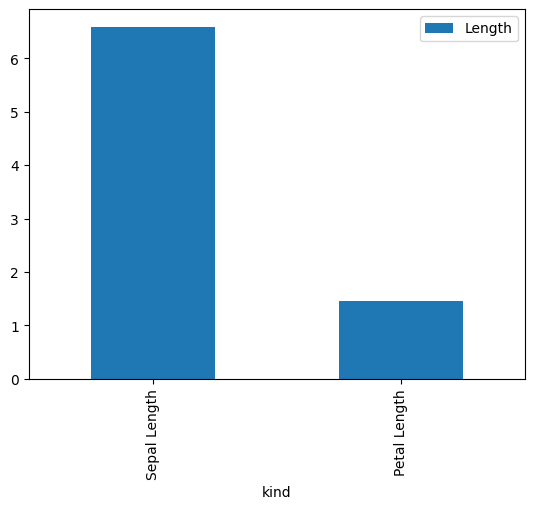

In [18]:
# code here
sepal = pd.merge(virginica, sepal_all, on="Id")["SepalLengthCm"].mean()
petal = pd.merge(setosa, petal_all, on="Id")["PetalLengthCm"].mean()
pd.DataFrame({"kind": ["Sepal Length", "Petal Length"], "Length": [sepal, petal]}).plot(x="kind", kind = "bar")

### Q-10: Create the complete dataset by uisng the below datasets:
virginica

versicolor

setosa

sepal all

petal all

This dataset should have these below column names in order:

Id

Species

SepalLengthCm

SepalWidthCm

PetalLengthCm

PetalWidthCm

Also, the dataset should be shuffled means the Id column should not be in increasing or decreasing order. So, make a dataset which has the shuffled Id column. You can use DataFrame.sample() method to shuffle.

In [19]:
# code here
v_sepal = pd.merge(virginica, sepal_all, on="Id").drop(columns= ["Unnamed: 0_x", "Unnamed: 0_y"])
v = pd.merge(v_sepal, petal_all, on="Id").drop(columns= ["Unnamed: 0"])

s_sepal = pd.merge(setosa, sepal_all, on="Id").drop(columns= ["Unnamed: 0_x", "Unnamed: 0_y"])
s = pd.merge(s_sepal, petal_all, on="Id").drop(columns= ["Unnamed: 0"])

ver_sepal = pd.merge(versicolor, sepal_all, on="Id").drop(columns= ["Unnamed: 0_x", "Unnamed: 0_y"])
ver = pd.merge(ver_sepal, petal_all, on="Id").drop(columns= ["Unnamed: 0"])

pd.concat([v, s, ver]).sample(150)

,Id,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
28,29,Iris-setosa,5.2,3.4,1.4,0.2
10,111,Iris-virginica,6.5,3.2,5.1,2.0
6,57,Iris-versicolor,6.3,3.3,4.7,1.6
0,1,Iris-setosa,5.1,3.5,1.4,0.2
29,130,Iris-virginica,7.2,3.0,5.8,1.6
...,...,...,...,...,...,...
3,104,Iris-virginica,6.3,2.9,5.6,1.8
7,8,Iris-setosa,5.0,3.4,1.5,0.2
7,58,Iris-versicolor,4.9,2.4,3.3,1.0
28,79,Iris-versicolor,6.0,2.9,4.5,1.5


Q-11: Find out the maximum and minimum sepal width and petal width of Setosa and Versicolor. To do this:

First create a dataset with merging the required datasets
After that, use groupby to create groups based on the "Species" column.
Then find out which are asked in this question.
The output should be like this:

In [20]:
# code here
print(f"Minimum Sepal width of Setosa is {s.SepalWidthCm.min()}")
print(f"Maximum Sepal width of Setosa is {s.SepalWidthCm.max()}")
print(f"Minimum Petal width of Setosa is {s.PetalWidthCm.min()}")
print(f"Maximum Petal width of Setosa is {s.PetalWidthCm.max()}")
print(f"Minimum Sepal width of Versicolor is {ver.SepalWidthCm.min()}")
print(f"Maximum Sepal width of Versicolor is {ver.SepalWidthCm.max()}")
print(f"Minimum Petal width of Versicolor is {ver.PetalWidthCm.min()}")
print(f"Maximum Petal width of Versicolor is {ver.PetalWidthCm.max()}")

Minimum Sepal width of Setosa is 2.3
Maximum Sepal width of Setosa is 4.4
Minimum Petal width of Setosa is 0.1
Maximum Petal width of Setosa is 0.6
Minimum Sepal width of Versicolor is 2.0
Maximum Sepal width of Versicolor is 3.4
Minimum Petal width of Versicolor is 1.0
Maximum Petal width of Versicolor is 1.8
